<a href="https://colab.research.google.com/github/saumya0303/attack_image/blob/master/LBFGS_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from numpy import load
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# load an image from file

In [0]:
#Loading data from imagenet dataset
import urllib.request
#fall1_urls.txt is a dataset consisting of urls and label corresponding to that
filepath = '/content/drive/My Drive/dataset/fall11_urls.txt'
cnt = 0
with open(filepath) as fp:
   line = fp.readline()
   print(line)
   while line:
       filename, url = line.strip().split()
      #  print(filename, url)
       try:
        urllib.request.urlretrieve(url, filename)
        image = load_img('/content/' + filename, target_size=(224, 224))
        print(filename, url) 
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        # predict the probability across all output classes
        yhat = model.predict(image)
        # convert the probabilities to class labels
        label = decode_predictions(yhat)
        # retrieve the most likely result, e.g. highest probability
        label = label[0][0]
        # print the classification
        print('%s (%.2f%%)' % (label[1], label[2]*100))
        cnt += 1
       except:
         pass
        # print("404, File not Found")
       line = fp.readline()
       #Large number of iterations are there but Ram size get crashed so we maintain a count for small set.
       if cnt == 25: 
         break

n00004475_6590	http://farm4.static.flickr.com/3175/2737866473_7958dc8760.jpg

n00004475_6590 http://farm4.static.flickr.com/3175/2737866473_7958dc8760.jpg
40960/35363 [==================================] - 0s 0us/step
balance_beam (17.82%)
n00004475_15899 http://farm4.static.flickr.com/3276/2875184020_9944005d0d.jpg
Shetland_sheepdog (26.55%)
n00004475_32312 http://farm3.static.flickr.com/2531/4094333885_e8462a8338.jpg
orangutan (95.90%)
n00004475_35466 http://farm4.static.flickr.com/3289/2809605169_8efe2b8f27.jpg
Egyptian_cat (45.86%)
n00004475_39382 http://2.bp.blogspot.com/_SrRTF97Kbfo/SUqT9y-qTVI/AAAAAAAABmg/saRXhruwS6M/s400/bARADEI.jpg
suit (61.16%)
n00004475_42770 http://farm4.static.flickr.com/3488/4051378654_238ca94313.jpg
water_ouzel (86.65%)
n00004475_54295 http://farm4.static.flickr.com/3368/3198142470_6eb0be5f32.jpg
howler_monkey (71.98%)
n00005787_66 http://ib.berkeley.edu/labs/koehl/images/hannah.jpg
wreck (71.43%)
n00005787_97 http://farm1.static.flickr.com/45/139488995_

In [0]:
#installation of foolbox
!pip3 install foolbox

     |████████████████████████████████| 1.9MB 2.9MB/s 
     |████████████████████████████████| 460kB 41.8MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
  Created wheel for foolbox: filename=foolbox-2.3.0-cp36-none-any.whl size=1926239 sha256=b088890ec3d50f0789c8fc459e5671e100e540554a502f9eed28280071b07c35
  Stored in directory: /root/.cache/pip/wheels/3a/e4/a4/b6a9e61a9729c442383d774328091f69d9235268401a1c9524
Successfully built foolbox


In [0]:
# import tensorflow as tf
import numpy as np
#use keras for image preprocess,decode,model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
kmodel = VGG16(weights='imagenet')
# images = tf.placeholder(tf.float32, (None, 224, 224, 3))
# preprocessed = vgg_preprocessing(images)
# logits = vgg16(preprocessed)
import foolbox
from foolbox.models import KerasModel
from foolbox.attacks import  DeepFoolL2Attack, GradientSignAttack
from foolbox.criteria import TargetClassProbability
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)


Using TensorFlow backend.






553467904/553467096 [==============================] - 6s 0us/step








In [0]:
 #Python Imaging Library (abbreviated as PIL) support for opening, manipulating, and saving many different image file formats.
 from PIL import Image
def image_preprocessing(path, shape=(224, 224), data_format='channels_last'):   
    image = Image.open(path)
    image = image.resize(shape)
    image = np.asarray(image, dtype=np.float32)
    image = image[:, :, :3]
    if data_format == 'channels_first':
        image = np.tra
    return image

In [0]:
#targeted_image consist 
targeted_image = image_preprocessing('/content/g.jpeg')
targeted_label = kmodel.predict(targeted_image[np.newaxis, :, :, ::-1])
print(np.argmax(targeted_label))
decode_predictions(targeted_label, top=5)

1


[[('n01443537', 'goldfish', 1.0),
  ('n01632777', 'axolotl', 4.030854e-11),
  ('n09256479', 'coral_reef', 1.413635e-12),
  ('n02607072', 'anemone_fish', 1.1605378e-12),
  ('n01440764', 'tench', 4.1638034e-13)]]

In [0]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
#train vgg16 on imagenet dataset
kmodel = VGG16(weights='imagenet')
from foolbox.v1.attacks import LBFGSAttack
# Show the original image/label that can be correctly classified by the victim classifier
#taking origina image as goldfish.jpeg
original_image = image_preprocessing('/content/g.jpeg')
original_label = kmodel.predict(original_image[np.newaxis, :, :, ::-1])
# setting target class as 388, which belongs to giant_panda 
attack = LBFGSAttack(model=fmodel, criterion=TargetClassProbability(388,p=.5)) 
adversarial = attack(original_image[:,:,::-1],original_label)

In [0]:
#Attacking the original image
adversarial_rgb = adversarial[np.newaxis, :, :, ::-1]
preds = kmodel.predict(preprocess_input(adversarial_rgb.copy()))
#printing top 5 probability of class after attack
decode_predictions(preds, top=5)

[[('n02510455', 'giant_panda', 0.89234966),
  ('n01443537', 'goldfish', 0.026850633),
  ('n04462240', 'toyshop', 0.011132022),
  ('n02134084', 'ice_bear', 0.006512631),
  ('n04399382', 'teddy', 0.0054292297)]]

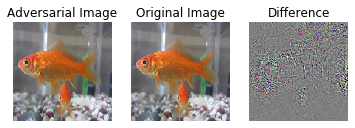

In [0]:
# show generated adversarial image
from numpy import load
import matplotlib.pyplot as plt
plt.figure()

plt.subplot(1, 3, 1)
plt.title('Adversarial Image')
plt.imshow(adversarial[:, :, ::-1] /255)  # division by 255 to convert [0, 255] to [0, 1]
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Original Image')
plt.imshow(original_image / 255)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
difference = adversarial[:, :, ::-1] - original_image
plt.imshow(difference / abs(difference).max() * 0.8 + 0.5)
plt.axis('off')

plt.show()

In [0]:
# show results

#print(np.argmax(fmodel.prediction(adversarial)))
adversarial_rgb = adversarial[np.newaxis, :, :, ::-1]
preds = kmodel.predict(preprocess_input(adversarial_rgb.copy()))
decode_predictions(preds, top=5)

[[('n02510455', 'giant_panda', 0.89234966),
  ('n01443537', 'goldfish', 0.026850633),
  ('n04462240', 'toyshop', 0.011132022),
  ('n02134084', 'ice_bear', 0.006512631),
  ('n04399382', 'teddy', 0.0054292297)]]